In [1]:
import numpy as np
#we will load the wine data from scikit-learn package
from sklearn.datasets import load_wine
wine = load_wine()
#check the shape of wine data
print(wine.data.shape)
A = wine.data
#Normalize columns of A so that all entries are in the range [-1,+1] 
for i in range(A.shape[1]):
    A[:,i] = -1+(((A[:,i]-min(A[:,i]))*2)/(max(A[:,i])-min(A[:,i]))) # USing the formula for custom range normalization
#check the shape of wine target
print(wine.target.shape)
#How many labels does wine data have?
num_of_classes = len(np.unique(wine.target))
C=num_of_classes
print(C)
n = wine.data.shape[0] #Number of data points
d = wine.data.shape[1] #Dimension of data points

(178, 13)
(178,)
3


In [2]:
#In the following code, we create a nx1 vector of target labels
y = 1.0*np.ones([A.shape[0],1])
for i in range(wine.target.shape[0]):
  if wine.target[i]!=1:
    y[i] = -1 # Convert class labels that are not 1 into -1
#Create an index array
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices
print(indexarr) #check indexarr after shuffling

[ 65 123   5 150  39  88  87  14  74 104  38 107   0 124  56  25 168   1
  96 167  27  34 133  94  41 137 156  92 177  44 160   4  97  63  40 140
 152  57  31  54 161 164  99 102  93 157 171   7  84  23  46  29  48  20
  21  86 113 147 141  55  30  22 112 115 165 176 172 170  73  85  58  81
  16  59  51   2 139 128 118 130  60 100  32 144  33  80 174  43 134 132
  12  76  42   8 148 142  11 126   3  28 145  62 101 153 121  35  19 119
 149 108 158  49  18  26  66  79 143  68 138 166 120 154  89 116  36 155
  77 110 117 109 162 173  98 159 175 151 163 106 169  70  45  61 129 103
  17  37  90  71  13 146  52 125  64  50 111  10  47  83 131 135  75 105
  91  15 136   9 127  67 122  95   6  82 114  78  53  72  24  69]


In [3]:
train_data = []
train_label = []
test_data = []
test_label = []
count = 1
for i in indexarr:
  if count <= int(0.8*n):
    train_data.append(list(A[i]))
    train_label.append(list(y[i]))
  else:
    test_data.append(list(A[i]))
    test_label.append(list(y[i]))
  count = count + 1
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [4]:
def predict(w,x):
  h = np.matmul(w.T, x)
  if h > 0:
    return 1
  elif  h < 0:
    return -1

In [5]:
def compute_accuracy(data,labels,model_w):
  c = 0
  n = len(data[0])
  for i in range(n):
    if predict(model_w, np.reshape(data[i], (np.shape(data)[1],1))) == labels[i]:
      c = c + 1
  return c/n 

#Q2.

In [6]:
def compute_loss_h(w,x,y):
  z = np.zeros(len(y))
  #print(w.shape)
  w = np.reshape(w, [d,1])
  for i in range(len(y)):
    z[i] = (y[i]*np.matmul(w.T, np.reshape(x[i], [d,1]))).item()

  #print(z)
  loss = [0 if z[i]>=1 else (1-z[i]) for i in range(len(z))]
  return np.array(loss)

def compute_objfnval(data,labels,model_w):
  return np.mean(compute_loss_h(model_w,data,labels))+ (lamda/2)*np.linalg.norm(model_w,2)**2

In [7]:
def compute_grad_loss_h(x,y,model):
  x = np.reshape(x,(d,1))
  model_w = np.reshape(model, (d,1))
  z = (y*np.matmul(model_w.T, x)).item()
  if z >=1:
    grad = (lamda/n)*model
  if z <1:
    grad = ((1/n)*(-y*x) + (lamda/n)*model)
  return grad

#Q3.

In [8]:
def compute_orthogonal_projection(z):
  t=len(z)
  ortho_proj = np.ones(t)
  if sum(abs(z[i]) for i in range(t)) <=1:
    ortho_proj = z
  else:
    ortho_proj = z/sum(abs(z[i]) for i in range(t))
  return ortho_proj

#Q4.

In [9]:
def OPT1(data,label,lamda, num_epochs):
  t = 1
  w = np.random.normal(0,0.1,(d,1))
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/(t)
      w = compute_orthogonal_projection(w-step * compute_grad_loss_h(data[i], label[i], w))
      t = t+1
    fval_array.append(compute_objfnval(data,label,w))
    test_set_accuracy_array.append(compute_accuracy(test_data,label,w))
    train_set_accuracy_array.append(compute_accuracy(train_data,label,w))

  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array

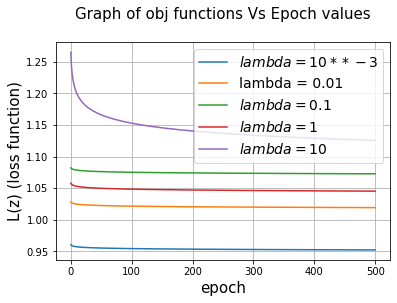

In [10]:
import matplotlib.pyplot as plt
num_epochs = 500
lambda_arr = [10**-3,0.01, 0.1, 1, 10]
data = train_data
label = train_label
epochs = np.linspace(0,500,500)
for lamda in lambda_arr:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  plt.plot(epochs, fval_array,label= r'$ $')
plt.grid()
plt.title('Graph of obj functions Vs Epoch values\n',fontsize=15)
plt.xlabel(r'epoch',fontsize=15)
plt.ylabel(r'L(z) (loss function)',fontsize=15)
plt.legend(["$lambda=10**-3$", "lambda = 0.01","$lambda=0.1$", "$lambda=1$","$lambda=10$"],fontsize=14)
plt.show()

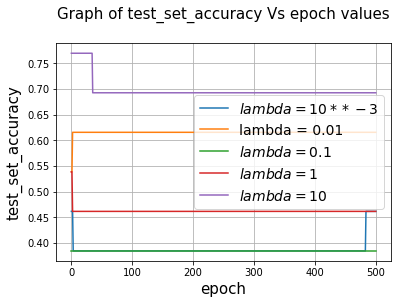

In [11]:
data = train_data
label = train_label
for lamda in lambda_arr:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  plt.plot(epochs, test_set_accuracy_array,label= r'$ $') 
plt.grid()
plt.title('Graph of test_set_accuracy Vs epoch values\n',fontsize=15)
plt.xlabel(r'epoch',fontsize=15)
plt.ylabel(r'test_set_accuracy',fontsize=15)
plt.legend(["$lambda=10**-3$", "lambda = 0.01","$lambda=0.1$", "$lambda=1$","$lambda=10$"],fontsize=14)
plt.show()

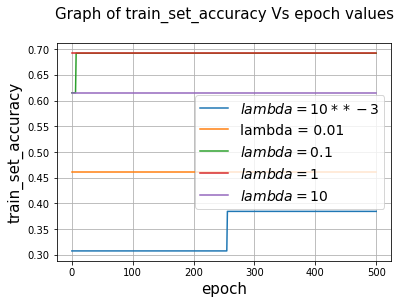

In [12]:
data = train_data
label = train_label
train_accuracy = []
test_accuracy = []
for lamda in lambda_arr:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  train_accuracy.append(train_set_accuracy_array)
  test_accuracy.append(test_set_accuracy_array)
  plt.plot(epochs, train_set_accuracy_array,label= r'$ $') 
plt.grid()
plt.title('Graph of train_set_accuracy Vs epoch values\n',fontsize=15)
plt.xlabel(r'epoch',fontsize=15)
plt.ylabel(r'train_set_accuracy',fontsize=15)
plt.legend(["$lambda=10**-3$", "lambda = 0.01","$lambda=0.1$", "$lambda=1$","$lambda=10$"],fontsize=14)
plt.show()

In [13]:
from tabulate import tabulate
data = [[lambda_arr[i],test_accuracy[i][-1],train_accuracy[i][-1]] for i in range(len(lambda_arr))]
head = ['Lamda','Final Test Accuracy','Final Train Accuracy']
print(tabulate(data, headers=head, tablefmt="pretty"))

+-------+---------------------+----------------------+
| Lamda | Final Test Accuracy | Final Train Accuracy |
+-------+---------------------+----------------------+
| 0.001 | 0.46153846153846156 | 0.38461538461538464  |
| 0.01  | 0.23076923076923078 | 0.46153846153846156  |
|  0.1  | 0.46153846153846156 |  0.6923076923076923  |
|   1   | 0.46153846153846156 |  0.6923076923076923  |
|  10   | 0.7692307692307693  |  0.6153846153846154  |
+-------+---------------------+----------------------+


We get reasonably good test accuracy for lamda = 1, however we get good train accuracy for lamda = 0.1,,1,10 .

Minimum value of lamda is obtained for lamda 0.001

#Q5.

For Logistic:

In [14]:
def compute_loss_l(w,x,y):
  w = np.reshape(w, [d,1])
  loss_l = np.log(np.add(1, np.exp(-np.dot(y, np.dot((x),w)))))
  return loss_l

def compute_objfnval_l(data,labels,w):
  a = np.multiply(lamda/2 , np.linalg.norm(w)**2)
  b = sum(compute_loss_l(w,data[i],labels[i]) for i in range(data.shape[0]))
  fval_l = np.add(a, b/data.shape[0])
  return fval_l

def compute_grad_loss_l(x,y,model_w):
  x = np.reshape(x, [d,1])
  model_w = np.reshape(model_w, [d,1])
  z = (y*np.matmul(model_w.T, x)).item()
  #print(z)
  grad = -((1/n)* y*x* np.exp(-z))/(1+np.exp(-z)) + (lamda/n)*model_w
  return grad

In [15]:
def OPT1(data,label,lamda, num_epochs):
  t = 1
  w = np.random.normal(0,0.1,(d,1))
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/(t)
      w = compute_orthogonal_projection(np.subtract(w , step * compute_grad_loss_l(data[i], label[i], w)))
      t = t+1
    fval_array.append(compute_objfnval_l(data,label,w))
    test_set_accuracy_array.append(compute_accuracy(test_data,label,w))
    train_set_accuracy_array.append(compute_accuracy(train_data,label,w))

  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array

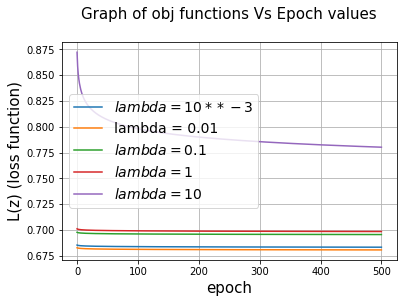

In [16]:
import matplotlib.pyplot as plt
num_epochs = 500
lambda_arr = [10**-3,0.01, 0.1, 1, 10]
data = train_data
label = train_label
epochs = np.linspace(0,500,500)
for lamda in lambda_arr:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  plt.plot(epochs, fval_array,label= r'$ $')
plt.grid()
plt.title('Graph of obj functions Vs Epoch values\n',fontsize=15)
plt.xlabel(r'epoch',fontsize=15)
plt.ylabel(r'L(z) (loss function)',fontsize=15)
plt.legend(["$lambda=10**-3$", "lambda = 0.01","$lambda=0.1$", "$lambda=1$","$lambda=10$"],fontsize=14)
plt.show()

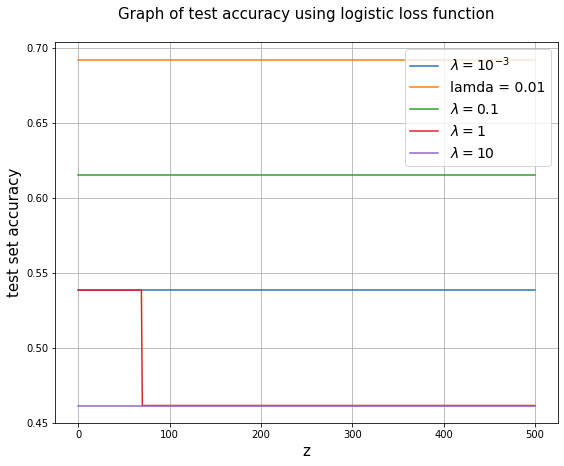

In [17]:
lambda_set = [0.001,0.01, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda,num_epochs)
  plt.plot(epochs,test_set_accuracy_array,label=r'$ $')
plt.grid()
plt.title('Graph of test accuracy using logistic loss function\n',fontsize=15)
plt.xlabel(r'z',fontsize=15)
plt.ylabel(r'test set accuracy',fontsize=15)
plt.legend(["$\lambda = 10^{-3}$","lamda = 0.01", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

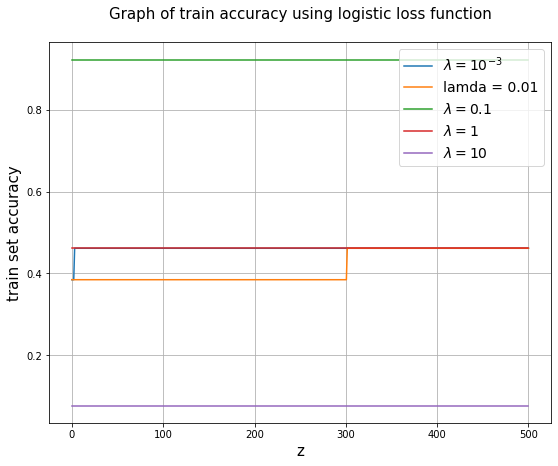

In [18]:
lambda_set = [0.001,0.01, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda,num_epochs)
  plt.plot(epochs,train_set_accuracy_array,label=r'$ $')
plt.grid()
plt.title('Graph of train accuracy using logistic loss function\n',fontsize=15)
plt.xlabel(r'z',fontsize=15)
plt.ylabel(r'train set accuracy',fontsize=15)
plt.legend(["$\lambda = 10^{-3}$","lamda = 0.01", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

In [19]:
Test_set_accuracy = []
Train_set_accuracy = []
lambda_set = [0.001,0.01, 0.1, 1, 10]
data = train_data
label = train_label
print("Using logistic loss function")
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda,num_epochs)
  Test_set_accuracy.append(test_set_accuracy_array[-1])
  Train_set_accuracy.append(train_set_accuracy_array[-1])
import pandas as pd
data = {'Lambda':lambda_set,'Test set accuracy':Test_set_accuracy,'Train set accuracy':Train_set_accuracy}
df = pd.DataFrame (data, columns = ['Lambda','Test set accuracy','Train set accuracy'])
print (df)

Using logistic loss function
   Lambda  Test set accuracy  Train set accuracy
0   0.001           0.384615            0.692308
1   0.010           0.307692            0.692308
2   0.100           0.461538            0.076923
3   1.000           0.461538            0.461538
4  10.000           0.153846            0.384615


Observations:We get quite low test set accuracies for all the values of lamda.

Hence this type of loss function is not good for this function when using the projection as per the funciton.

Squared Hinge:

In [20]:
def compute_loss_sh(w,x,y):
  w = np.reshape(w, [d,1])
  a = np.subtract(1, np.dot(y, np.dot(np.transpose(x),w)))
  loss_sh = max(0, a)**2
  return loss_sh

def compute_objfnval_sh(data,labels,w):
  a = np.multiply(lamda/2 , np.linalg.norm(w)**2)
  b = sum(compute_loss_sh(w,data[i],labels[i]) for i in range(data.shape[0]))
  fval_sh = np.add(a, b/data.shape[0])
  return fval_sh

def compute_grad_loss_sh(x,y,model_w, lam):
 x = np.reshape(x, [d,1])
 model_w = np.reshape(model_w, [d,1])
 z = (y*np.matmul(model_w.T, x)).item()
 if z >=1:
   grad = (lam/n)*model_w
 if z <1:
   grad = ((2/n)*(-y* x)*(1-z) + (lam/n)*model_w)
 return grad

In [21]:
def OPT1(data,label,lamda, num_epochs):
  t = 1
  w = np.random.normal(0,0.1,(d,1))
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/(t)
      w = compute_orthogonal_projection(np.subtract(w , step * compute_grad_loss_sh(data[i], label[i], w,lamda)))
      t = t+1
    fval_array.append(compute_objfnval_sh(data,label,w))
    test_set_accuracy_array.append(compute_accuracy(test_data,label,w))
    train_set_accuracy_array.append(compute_accuracy(train_data,label,w))

  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array

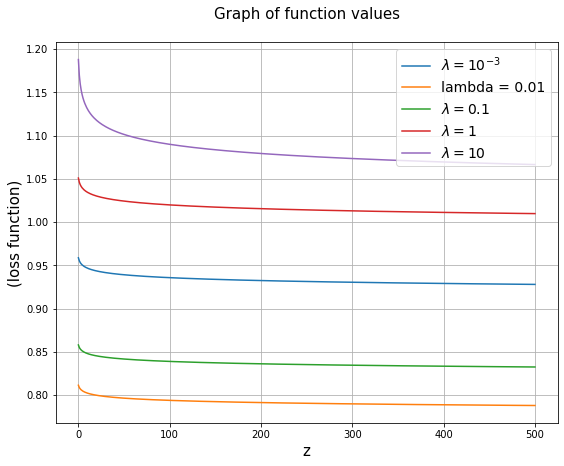

In [22]:
num_epochs = 500
lambda_set = [0.001,0.01, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  plt.plot(epochs,fval_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of function values\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'(loss function)',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$", "lambda = 0.01","$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

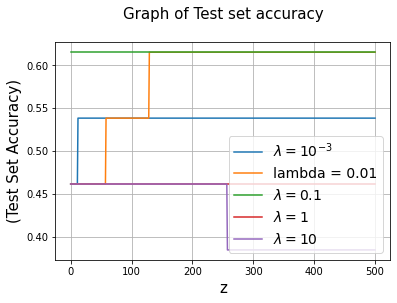

In [23]:
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  plt.plot(epochs,test_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of Test set accuracy\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'(Test Set Accuracy)',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$", "lambda = 0.01","$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

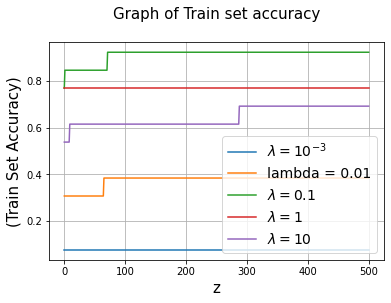

In [24]:
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  plt.plot(epochs,train_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of Train set accuracy\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'(Train Set Accuracy)',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$", "lambda = 0.01","$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

In [25]:
lambda_set = [10**-3,0.01, 0.1, 1, 10]
data = train_data
label = train_label
Test_set_accuracy = []
Train_set_accuracy = []
print("Using squared hinge loss function:")
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  Test_set_accuracy.append(test_set_accuracy_array[-1])
  Train_set_accuracy.append(train_set_accuracy_array[-1])
import pandas as pd
data = {'Lambda':lambda_set,'Test set accuracy':Test_set_accuracy,'Train set accuracy':Train_set_accuracy}
df = pd.DataFrame (data, columns = ['Lambda','Test set accuracy','Train set accuracy'])
print (df)

Using squared hinge loss function:
   Lambda  Test set accuracy  Train set accuracy
0   0.001           0.615385            0.230769
1   0.010           0.384615            0.384615
2   0.100           0.692308            0.769231
3   1.000           0.307692            0.692308
4  10.000           0.538462            0.769231


Here , function doesn't have significantly higher accuracy for any lambda... Ans hence it is not a good loss function for the funciton. 